<a href="https://colab.research.google.com/github/Hpkarimi/googleColab/blob/main/portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
historyData = pd.read_csv('./drive/MyDrive/HistPivot991230Adj.csv'
                          , header=0
                          , index_col=0)

In [ ]:
weights = np.zeros((historyData.shape[1]))
weights[:] = 1/historyData.shape[1]

In [ ]:
historyData['DataCol'] = pd.to_datetime(historyData.index, format='%Y%m%d')

In [ ]:
historyData.index = historyData['DataCol']

In [ ]:
historyData.index.name = 'Date'

In [ ]:
historyData.drop('DataCol', axis=1,inplace=True)

In [ ]:
for c in historyData.columns.values:
  historyData[c] = historyData[c].replace({0:np.nan})

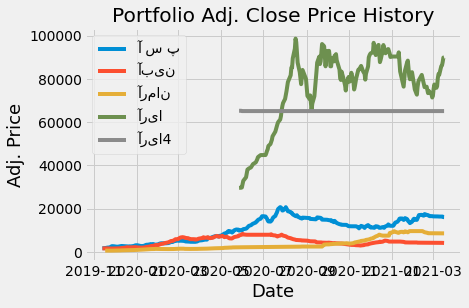

In [ ]:
title = 'Portfolio Adj. Close Price History'
i = 1
col = []

for c in historyData.columns.values:
  # plt.plot(historyData[c][4600:], label=c)
  # print("\nReplacing NaNs with the value from the previous row :")
  plt.plot(historyData[c][4500:].fillna(method='pad'), label=c)
  # print("\nReplacing NaNs with the value from the next row :")
  # df['sale_amt'].fillna(method='bfill', inplace=True)
  col.append(c)
  if i == 5 :
    break
  i += 1
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price', fontsize=18)

plt.legend(col, loc='upper left')
plt.show()

In [ ]:
#show daily simple return
returns = historyData.pct_change()
returns

,آ س پ,آبین,آرمان,آریا,آریا4,آریان,آریان2,آریان4,آسیا,آپ,آینده,اتکام,اتکای,اتکای2,اخابر,اخابر4,ارفع,اعتلا,افرا,افرا2,افق,البرز,امید,امین,انرژی1,انرژی2,انرژی3,اوان,اپرداز,اپرداز2,اکالا,بالاس,بالبر,بایکا,بترانس,بترانس2,بتک,بجهرم,بخاور,برکت,...,کسرا,کسرام,کسعدی,کشرق,کصدف,کطبس,کفرآور,کفرا,کفپارس,کقزوی,کلر,کلوند,کماسه,کمرجان,کمنگنز,کمینا,کنور,کهرام,کهمدا,کوثر,کورز,کویر,کپارس,کپرور,کپشیر,کچاد,کچاد4,کگاز,کگل,کگهر,کی بی سی,کیسون,کیسون2,کیمیا,گدنا,گشان,گوهران,گپارس,گکوثر,گکیش
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.006579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-13,-0.000487,-0.003502,0.000000,0.049400,0.0,0.012848,-0.001930,0.0,-0.012500,0.000000,-0.000996,-0.006617,0.000000,0.0,-0.013320,0.0,0.051919,-0.000236,-0.000028,0.0,-0.007046,-0.002874,-0.001181,0.0,0.0,0.0,0.0,-0.000255,-0.000047,0.000000,0.0,0.023330,-0.005436,-0.000023,-0.018727,0.0,0.0,-0.010464,-0.009052,0.054786,...,-0.000454,-0.001188,-0.002294,-0.000063,-0.001290,-0.005293,-0.019763,-0.000420,0.000000,-0.000583,-0.001463,-0.001497,-0.000449,0.000000,-0.001357,-0.019458,0.058073,0.021741,-0.005040,-0.001018,0.0,0.000000,-0.017071,-0.009297,-0.010108,0.055823,0.0,-0.001079,0.027317,0.001733,-0.000214,-0.000204,0.0,-0.003267,-0.000263,-0.002300,-0.009993,-0.000096,-0.010556,-0.000320
2021-03-14,-0.000488,0.000000,0.000000,0.003085,0.0,0.018617,0.000000,0.0,-0.008439,-0.000549,-0.000249,-0.004037,0.025302,0.0,-0.011423,0.0,0.015660,-0.000237,-0.000028,0.0,-0.010077,0.011527,-0.011820,0.0,0.0,0.0,0.0,-0.000346,-0.000900,0.000000,0.0,0.018050,-0.004340,-0.001028,0.026718,0.0,0.0,0.007402,-0.007993,-0.002918,...,-0.001817,-0.001189,-0.002299,-0.000010,0.000000,0.000000,-0.006131,-0.000210,0.000000,-0.000194,-0.018930,-0.001071,-0.000449,-0.000075,-0.000792,-0.019184,0.024752,0.013120,-0.002026,-0.001223,0.0,-0.000440,0.011953,-0.003103,-0.016148,0.053327,0.0,-0.005943,0.045881,0.002725,-0.000356,-0.000136,0.0,-0.0164

In [ ]:
# create and show annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,آ س پ,آبین,آرمان,آریا,آریا4,آریان,آریان2,آریان4,آسیا,آپ,آینده,اتکام,اتکای,اتکای2,اخابر,اخابر4,ارفع,اعتلا,افرا,افرا2,افق,البرز,امید,امین,انرژی1,انرژی2,انرژی3,اوان,اپرداز,اپرداز2,اکالا,بالاس,بالبر,بایکا,بترانس,بترانس2,بتک,بجهرم,بخاور,برکت,...,کسرا,کسرام,کسعدی,کشرق,کصدف,کطبس,کفرآور,کفرا,کفپارس,کقزوی,کلر,کلوند,کماسه,کمرجان,کمنگنز,کمینا,کنور,کهرام,کهمدا,کوثر,کورز,کویر,کپارس,کپرور,کپشیر,کچاد,کچاد4,کگاز,کگل,کگهر,کی بی سی,کیسون,کیسون2,کیمیا,گدنا,گشان,گوهران,گپارس,گکوثر,گکیش
آ س پ,0.170669,0.026946,0.000385,0.018795,0.000031,0.015448,7.436135e-03,0.002736,0.014510,0.031864,0.033119,0.032274,0.024796,0.000030,0.017407,6.620110e-04,0.038668,0.046667,0.027048,5.313217e-04,0.017502,0.030342,0.041505,-0.003608,-0.002145,-0.010953,0.025419,0.016628,0.033848,7.978843e-05,-1.065905e-04,0.041433,0.015612,-0.002945,0.032645,-0.001089,2.383460e-03,0.070384,0.028645,0.045188,...,0.029790,0.019798,0.014041,0.030893,0.013897,0.034814,0.030312,0.035944,0.028745,0.031921,0.023961,0.017489,0.028143,0.031261,0.022104,0.063592,0.023056,0.029306,0.031542,0.025615,-5.757501e-05,0.023145,0.021870,0.031378,0.029512,0.015478,3.818192e-03,0.032475,0.017898,0.041837,0.032905,0.042036,-0.001742,0.032056,-0.035177,0.009958,0.035412,0.014369,0.036654,0.027468
آبین,0.026946,0.500586,0.001471,-0.019127,-0.000086,0.018106,4.518137e-04,-0.000041,0.028746,0.018752,0.032777,0.016645,0.018569,0.001032,0.016028,-5.483894e-04,0.011251,0.026190,0.046782,1.155818e-03,0.019365,0.040967,0.015895,-0.013289,0.001857,0.000108,0.014361,0.021784,0.027832,1.589040e-03,1.777109e-03,0.038018,0.028839,0.006499,0.032891,0.004570,2.603556e-02,0.015560,0.002613,0.031678,...,0.036275,0.050824,0.024049,0.033999,0.026991,0.018818,0.057571,0.026750,0.037720,0.035550,0.051930,0.047266,0.026604,0.020724,0.015254,0.031940,0.033001,0.048049,0.029520,0.011487,-7.606076e-04,0.035658,0.026148,0.022478,0.043144,0.011044,-2.458016e-03,0.024626,0.009883,0.012422,0.028158,0.021741,0.000097,0.034698,0.010051,-0.003202,0.020371,0.058972,0.031254,0.030674
آرمان,0.000385,0.001471,0.137027,-0.016584,-0.000007,0.004011,-1.025226e-02,0.000529,0.004446,0.004164,-0.003295,0.001803,0.003764,0.000082,0.001262,-1.750144e-05,0.001174,0.005864,0.000775,5.341173e-05,0.011811,0.004505,-0.005760,0.002561,0.000576,-0.004348,0.003243,0.003498,0.004781,-5.455531e-04,-7.279320e-05,0.003959,-0.000729,-0.000813,0.000571,-0.001455,5.395132e-03,-0.006035,0.005829,0.010502,...,0.001994,0.000391,0.003875,0.000337,0.006922,0.008625,0.009590,-0.000769,0.004370,0.009003,-0.005505,-0.000980,-0.003660,0.000388,0.000792,-0.019429,-0.000034,0.014055,-0.000372,0.012859,1.201613e-04,-0.008614,-0.003290,0.002370,0.000229,0.003531,4.493207e-03,0.000729,0.002888,0.001391,0.000791,0.005423,-0.000184,0.000269,0.016680,-0.001706,0.005900,0.003901,-0.001178,0.003588
آریا,0.018795,-0.019127,-0.016584,0.235803,0.000005,0.033823,3.514466e-03,-0.006347,0.063439,0.087373,0.008483,0.050539,0.028017,0.001501,0.141368,2.569931e-03,0.149602,0.021629,0.049966,1.101050e-03,0.079206,0.061199,0.059780,0.057682,0.000000,0.000000,0.006934,0.039780,0.070994,-3.722646e-04,-2.229199e-04,0.031203,-0.005723,0.005260,0.057755,-0.000444,2.032271e-04,0.106305,0.042402,0.060680,...,0.016646,-0.005535,0.020124,0.036536,-0.000557,0.023051,-0.006818,0.001475,0.001814,0.012146,0.045679,-0.002009,-0.006302,-0.011742,0.059380,0.023081,0.103386,-0.011086,0.051503,0.006466,2.097856e-05,0.017689,0.029214,0.013895,0.004408,0.133432,3.735602e-03,0.023606,0.126704,0.066521,0.047545,0.016422,0.000000,0.013987,0.062125,0.009516,0.040167,-0.013242,0.042219,-0.002024
آریا4,0.000031,-0.000086,-0.000007,0.000005,0.000005,-0.000074,-5.886008e-07,0.000002,-0.000037,0.000062,-0.000033,0.000099,0.000061,0.000001,0.000118,7.627722e-08,-0.000037,-0.000014,0.000004,6.533640e-07,0.000120,-0.000027,-0.000034,0.000000,0.000000,0.000000,-0.000061,0.000123,0.000111,-7.731463e-07,-1.065800e-07,-0.000083,0.000069,-0.000073,-0.000064,0.000001,1.617843e-08,0.000088,0.000071,0.000085,...,-0.000118,-0.0

In [ ]:
# calculate the portfolio variance
weights = np.zeros((historyData.shape[1]))
weights[:] = 1/historyData.shape[1]
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.10377291116832134

In [ ]:
# calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.322138031235558

In [ ]:
# calculate the annual portfolio return
portfolioSimpleReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleReturn

0.6816753886626106

In [ ]:
# show the expected annual return , volatility (risk), and variance
percent_var = str( round(port_variance, 2)*100)+'%'
percent_vols = str(round(port_volatility, 2)*100)+'%'
percent_ret = str(round(portfolioSimpleReturn, 2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility / risk: '+percent_vols)
print('Annual variance: '+percent_var)

Expected annual return: 68.0%
Annual volatility / risk: 32.0%
Annual variance: 10.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 4.1MB/s 
     |████████████████████████████████| 1.3MB 7.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.11-cp37-cp37m-linux_x86_64.whl size=2725543 sha256=7d1850309e070cc7757db5f222ae2f10980f3a5f748b61825f6d35b77f299906
  Stored in directory: /root/.cache/pip/wheels/df/d4/eb/c74e09a39bc4ac09b3a8d2a48c1c6009f391056d8c87bf68aa
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(historyData)
S = risk_models.sample_cov(historyData)

# optimize for max sharp ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
# cleaned_weights['آسیا']
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  "Could not fix matrix. Please try a different risk model.", UserWarning


OrderedDict([('آ س پ', 0.0), ('آبین', 0.0), ('آرمان', 0.0), ('آریا', 0.0), ('آریا4', 0.0), ('آریان', 0.0), ('آریان2', 0.00025), ('آریان4', 0.0), ('آسیا', 0.0), ('آپ', 0.0), ('آینده', 0.0), ('اتکام', 0.0), ('اتکای', 0.0), ('اتکای2', 0.0063), ('اخابر', 0.0), ('اخابر4', 0.0), ('ارفع', 0.0), ('اعتلا', 0.0), ('افرا', 0.0), ('افرا2', 0.0), ('افق', 0.0), ('البرز', 0.0), ('امید', 0.0), ('امین', 0.0), ('انرژی1', 0.0), ('انرژی2', 0.0), ('انرژی3', 0.0), ('اوان', 0.0), ('اپرداز', 0.0), ('اپرداز2', 0.0), ('اکالا', 0.00462), ('بالاس', 0.0), ('بالبر', 0.0), ('بایکا', 0.00023), ('بترانس', 0.0), ('بترانس2', 0.00109), ('بتک', 0.0), ('بجهرم', 0.0), ('بخاور', 0.0), ('برکت', 0.0), ('بزاگرس', 0.0), ('بساما', 0.0), ('بسویچ', 0.0), ('بسویچ4', 0.0), ('بشهاب', 0.0), ('بفجر', 0.0), ('بموتو', 0.0), ('بمپنا', 0.0), ('بمیلا', 0.0), ('بنو', 0.0), ('بنیرو', 0.0), ('بهپاک', 0.0), ('بورس', 0.0), ('بوعلی', 0.0), ('بپاس', 0.00612), ('بپیوند', 0.0), ('بکاب', 0.0), ('بکام', 0.0), ('بکهنوج', 0.0), ('بگیلان', 0.0), ('تابا', 

(3.724375942954534, 0.016987829386489472, 218.06058082386014)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_price = get_latest_prices(historyData)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_price, total_portfolio_value = 1000000000)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'آریان2': 22, 'اتکای2': 401, 'اکالا': 115, 'بایکا': 6, 'بترانس2': 360, 'بپاس': 80, 'تسه9611': 6, 'تفیرو': 10, 'جم پیلن2': 328, 'خبازرس': 874, 'خلیبل': 117311, 'خودکفا2': 73, 'دتهران\u200c': 12, 'رافزا': 55, 'سپیدار': 96, 'سکارون': 10, 'شاملا2': 277, 'شتران4': 9641, 'شصدف': 27, 'شفارا2': 4986, 'شپنا2': 1493, 'شکف': 14, 'شگل': 200, 'شیراز2': 12, 'غدام': 1, 'غصینو2': 131, 'غگیلا': 591, 'فارس4': 561, 'فاهواز2': 2232, 'فبستم': 366, 'فنرژی': 39, 'قنقش': 4, 'معیار ': 29, 'نبروج': 35, 'نبورس': 166, 'نمرینو': 47, 'واعتبار2': 273, 'وساربیل': 125446, 'وسالت': 382, 'وسبوشهر': 22159, 'وسخراج': 7568, 'وسرضوی': 27107, 'وسصفا': 9627, 'وسفارس': 27107, 'وسقم': 10561, 'وسلرستا': 3556, 'وسمرکز': 19943, 'وسهمدا': 10203, 'وسکرمان': 4379, 'وسگلستا': 22517, 'وسیزد': 110774, 'وشهر': 102, 'وغدیر2': 154, 'ومعادن2': 939, 'ومعلم4': 1117, 'وملی': 4, 'وهنر2': 512, 'وپست4': 57, 'وپویا4': 6810, 'چخزر': 170, 'کاوه2': 427, 'کباده': 41, 'کزغال': 492, 'کورز': 14, 'گدنا': 38}
Funds remaining: $308871